# DRAFT VERSION. 

### It is based on my local folders. I will refactor whole code asap. :)

I am trying to reproduce [pyannote.audio](https://github.com/pyannote/pyannote-audio) tutorials.

In [ ]:
# Clone the repository to access .yml files.

!git clone https://github.com/pyannote/pyannote-audio.git

In [2]:
import numpy as np

In [3]:
!python --version

Python 3.6.5 :: Anaconda custom (64-bit)


In [4]:
from pyannote.database import *

In [ ]:
# Read the config.yml file to reproduce exact result. 

# !cat ./pyannote-audio/tutorials/change-detection/config.yml

In this notebook, I will use AMI Corpus.

In [ ]:
# To get shell script to download AMI Corpus. Also, you can create new script from
# http://groups.inf.ed.ac.uk/ami/download/ Please select all meetings and headset
# mix for this example.


!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Give permission to AMI Corpus script

!chmod +x amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Run the shell script to download datas.

! ./amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Create new folder to create db.yml inside of that folder.

!mkdir .pyannote

In [ ]:
! cat ./.pyannote/db.yml | grep AMI


I am trying to create db.yml via cat command, however, with Google Colab, I can not do that. So that, I just download this file from my Google Drive. To create, you own db.yml, you can use any text editor. We should write the directory of AMI Corpus. In this case, it is  **AMI: ../pyannote-audio/amicorpus/*/audio/{uri}.wav**


In [ ]:
!cat ./.pyannote/db.yml | grep AMI 

In [ ]:
!ls

In [5]:
cd pyannote-audio

/home/herdogan/Desktop/SpChangeDetect/pyannote-audio


Now, time for the tutorials. In this notebook, I will provide codes for training and validation. For further information, please check the [repository.](github.com/pyannote/pyannote-audio/tree/master/tutorials)

## **Feature Extraction**

In [ ]:
!cat tutorials/feature-extraction/config.yml

In [ ]:
!pyannote-speech-feature tutorials/feature-extraction AMI.SpeakerDiarization.MixHeadset

In [ ]:
!ls tutorials/feature-extraction/AMI | head -n 5

In [ ]:
import numpy as np
en2001a_mfcc_arr = np.load("tutorials/feature-extraction/AMI/EN2001a.Mix-Headset.npy")

In [ ]:
print (en2001a_mfcc_arr)
print (en2001a_mfcc_arr.shape)
print (en2001a_mfcc_arr.max())
print (en2001a_mfcc_arr.mean())
print (en2001a_mfcc_arr.min())
# en2201a -> 5223 seconds

In the paper, they use 13 coefficients for mfcc and mfcc´s derivatives. However, in code, they use 19 coefficients for these features.

## *Speech activity detection*

In [ ]:
cat tutorials/speech-activity-detection/config.yml

If you want to use tensorboard, you can check [this](https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab)

In [ ]:
# Training.

!pyannote-speech-detection train --to=5 tutorials/speech-activity-detection AMI.SpeakerDiarization.MixHeadset

In [ ]:
# Validation.

!pyannote-speech-detection validate tutorials/speech-activity-detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

## *Speaker Change Detection*

In [ ]:
cat tutorials/change-detection/config.yml

In [1]:
!pyannote-speech-detection -h 

Speech activity detection

Usage:
  pyannote-speech-detection train [options] <experiment_dir> <database.task.protocol>
  pyannote-speech-detection validate [options] [--every=<epoch> --chronological] <train_dir> <database.task.protocol>
  pyannote-speech-detection apply [options] [--step=<step>] <model.pt> <database.task.protocol> <output_dir>
  pyannote-speech-detection -h | --help
  pyannote-speech-detection --version

Common options:
  <database.task.protocol>   Experimental protocol (e.g. "AMI.SpeakerDiarization.MixHeadset")
  --database=<db.yml>        Path to database configuration file.
                             [default: ~/.pyannote/db.yml]
  --subset=<subset>          Set subset (train|developement|test).
                             Defaults to "train" in "train" mode. Defaults to
                             "development" in "validate" mode. Not used in
                             "apply" mode.
  --gpu                      Run on GPUs. Defaults to using CPUs.
  --batch=

In [ ]:
# Training.

!pyannote-change-detection train --to=10  tutorials/change-detection AMI.SpeakerDiarization.MixHeadset 

In [ ]:
# Validation
!pyannote-change-detection validate --purity=0.8 --to=5 tutorials/change-detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

In [ ]:
cd ..

In [ ]:
!ls

In [ ]:
mkdir raw_scores

In [ ]:
cd pyannote-audio/

In [ ]:
!pyannote-change-detection apply tutorials/change-detection/train/AMI.SpeakerDiarization.MixHeadset.train/weights/0005.pt   AMI.SpeakerDiarization.MixHeadset raw_scores

In [6]:
#AMI Protocol
from pyannote.database import get_protocol
protocol = get_protocol('AMI.SpeakerDiarization.MixHeadset')

In [7]:
# Precomputed Scores
from pyannote.audio.features import Precomputed
precomputed = Precomputed('raw_scores')

In [8]:
precomputed

In [9]:
precomputed.shape

<bound method Precomputed.shape of <pyannote.audio.features.utils.Precomputed object at 0x7f0aedad5e10>>

In [10]:
# Peak Detection
from pyannote.audio.signal import Peak
peak = Peak(alpha=0.5, min_duration=1.0, log_scale=True)

In [11]:
en2001a_out = np.load("./raw_scores/AMI/EN2001a.Mix-Headset.npy")

In [12]:
en2001a_out.shape
# Why it is 2 dimensional?

(525025, 2)

In [13]:
print (en2001a_out)
print (en2001a_out.max())
print (en2001a_out.mean())

[[-0.1005969  -2.34651065]
 [-0.10032313 -2.34910131]
 [-0.10025888 -2.34971023]
 ..., 
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
0.0
-1.22235


In [17]:
print(en2001a_out[:,1])
print(en2001a_out[:,1].max())
print(en2001a_out[:,1].mean())

[-2.34651065 -2.34910131 -2.34971023 ...,  0.          0.          0.        ]
0.0
-2.34386


In [22]:
output = .5 * (en2001a_out[:, 0] + en2001a_out[:, 1])

In [23]:
print (output)
print (output.max())
print (output.mean())

[-1.22355378 -1.22471225 -1.22498453 ...,  0.          0.          0.        ]
0.0
-1.22235


In [18]:
en2001a_out_exp = np.exp(en2001a_out)

In [19]:
print (en2001a_out_exp)
print (en2001a_out_exp.max())
print (en2001a_out_exp.mean())

[[ 0.90429747  0.09570252]
 [ 0.90454507  0.09545491]
 [ 0.90460318  0.0953968 ]
 ..., 
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]]
1.0
0.500062


In [20]:
print(en2001a_out_exp[:,1])
print(en2001a_out_exp[:,1].max())
print(en2001a_out_exp[:,1].mean())

[ 0.09570252  0.09545491  0.0953968  ...,  1.          1.          1.        ]
1.0
0.0960464


In [24]:
# Evaluation Metric
from pyannote.metrics.diarization import DiarizationPurityCoverageFMeasure
metric = DiarizationPurityCoverageFMeasure()

In [25]:
# Loop on Test Files
from pyannote.database import get_annotated
for test_file in protocol.test():
    # print (test_file)
    # load reference annotation
    reference = test_file['annotation']
    uem = get_annotated(test_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(test_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)
    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

Purity = 39.2% / Coverage = 100.0%
Purity = 35.7% / Coverage = 100.0%
Purity = 36.6% / Coverage = 100.0%
Purity = 35.6% / Coverage = 100.0%
Purity = 35.5% / Coverage = 100.0%
Purity = 34.7% / Coverage = 100.0%
Purity = 36.5% / Coverage = 100.0%
Purity = 37.1% / Coverage = 100.0%
Purity = 36.9% / Coverage = 100.0%
Purity = 37.8% / Coverage = 100.0%
Purity = 38.5% / Coverage = 100.0%
Purity = 37.7% / Coverage = 100.0%
Purity = 37.5% / Coverage = 100.0%
Purity = 37.7% / Coverage = 100.0%
Purity = 39.2% / Coverage = 100.0%
Purity = 39.3% / Coverage = 100.0%
Purity = 39.2% / Coverage = 100.0%
Purity = 39.9% / Coverage = 100.0%
Purity = 40.4% / Coverage = 100.0%
Purity = 39.7% / Coverage = 100.0%
Purity = 38.9% / Coverage = 100.0%
Purity = 38.6% / Coverage = 100.0%
Purity = 38.6% / Coverage = 100.0%


In [28]:
print(reference)

[ 00:01:39.500 -->  00:01:54.062] 0 MTD025PM
[ 00:01:42.940 -->  00:01:44.295] 1 MTD026UID
[ 00:01:43.189 -->  00:01:45.239] 2 MTD028ME
[ 00:01:54.300 -->  00:01:54.796] 3 MTD027ID
[ 00:01:54.668 -->  00:01:57.685] 4 MTD026UID
[ 00:01:55.212 -->  00:01:57.659] 5 MTD025PM
[ 00:01:55.840 -->  00:01:56.170] 6 MTD027ID
[ 00:01:56.300 -->  00:01:57.784] 7 MTD028ME
[ 00:01:58.930 -->  00:02:16.508] 8 MTD025PM
[ 00:02:01.200 -->  00:02:01.959] 9 MTD026UID
[ 00:02:01.810 -->  00:02:03.079] 10 MTD028ME
[ 00:02:01.850 -->  00:02:03.420] 11 MTD027ID
[ 00:02:03.575 -->  00:02:04.310] 12 MTD026UID
[ 00:02:09.592 -->  00:02:10.488] 13 MTD027ID
[ 00:02:17.220 -->  00:02:17.480] 14 MTD028ME
[ 00:02:17.820 -->  00:03:04.601] 15 MTD025PM
[ 00:02:23.440 -->  00:02:23.989] 16 MTD028ME
[ 00:02:27.240 -->  00:02:27.789] 17 MTD028ME
[ 00:02:28.332 -->  00:02:30.049] 18 MTD027ID
[ 00:02:29.333 -->  00:02:31.338] 19 MTD028ME
[ 00:02:30.340 -->  00:02:32.580] 20 MTD026UID
[ 00:02:32.892 -->  00:02:35.483] 21 MT

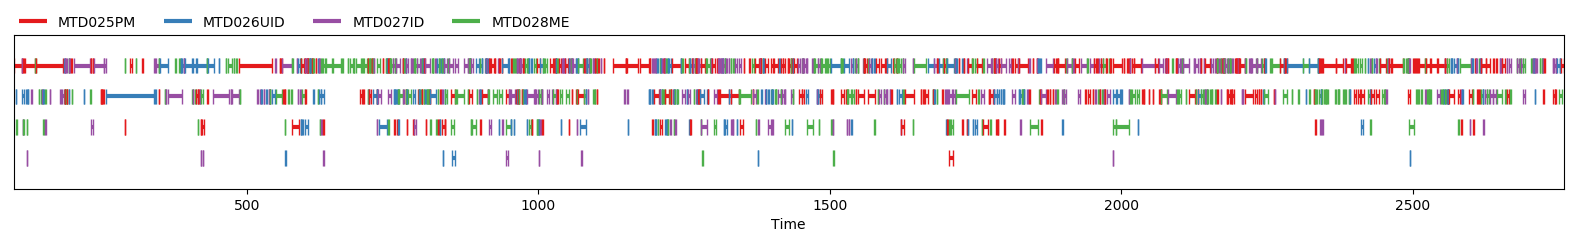

In [26]:
reference

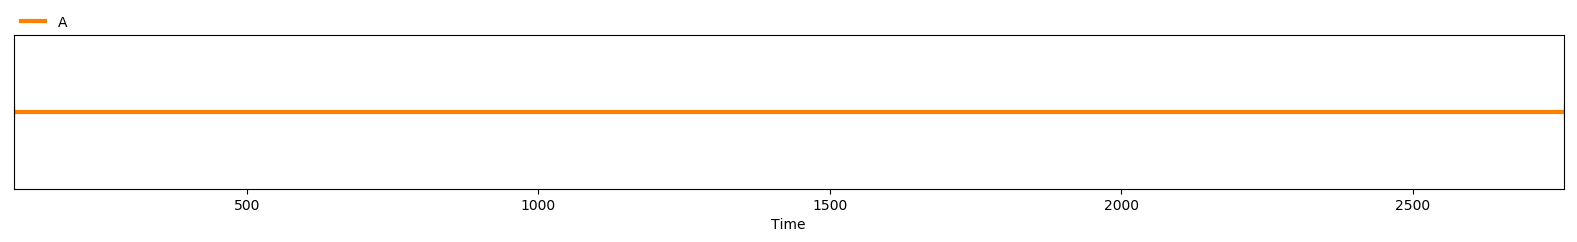

In [27]:
hypothesis.to_annotation()

In [ ]:
# Loop on Train Files
from pyannote.database import get_annotated
for train_file in protocol.train():
    # print (test_file)
    # load reference annotation
    reference = train_file['annotation']
    uem = get_annotated(train_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(train_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)

    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

In [ ]:
# Peak Detection
from pyannote.audio.signal import Peak
peak = Peak(alpha=0.1, min_duration=1.0, log_scale=True)

# Loop on Test Files
from pyannote.database import get_annotated
for test_file in protocol.train():
    # print (test_file)
    # load reference annotation
    reference = test_file['annotation']
    uem = get_annotated(test_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(test_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)

    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

In [ ]:
hypothesis.to_annotation()